Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Answer:

Ensemble techniques combine multiple models (weak learners) to improve prediction accuracy and robustness. The core idea is that while individual models may make mistakes, their combined output averages out errors. This leverages the "wisdom of crowds"; when done right, ensembles build stronger models than any single one.​

Bagging (Bootstrap Aggregating) draws random samples (with replacement) from data to train each model independently. Later, it averages (regression) or votes (classification) across all models. Bagging mainly aims to reduce variance—helping stabilize models that may overfit, like decision trees.​

Boosting trains models sequentially. Each new model focuses on the errors (misclassifications) of previous models, effectively "boosting" poor results step-by-step. Boosting aims to reduce bias by having each learner correct mistakes of the prior ones.

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Answer:

A Random Forest builds many decision trees on bootstrapped (random, sampled-with-replacement) subsets of the data, and averages/votes their predictions. This introduces randomness, so trees learn different features and patterns, which reduces overfitting compared to fitting a single tree that might memorize the data.​

Key hyperparameters:

n_estimators: Number of trees. More trees average out unpredictable decisions, reducing overfitting.​

max_features: Number of features considered for each split. Limiting this adds unpredictability, making trees less correlated and further reducing overfitting.​

Other effective params: max_depth, min_samples_leaf can also limit each tree’s complexity to improve generalization.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Answer:

Stacking combines predictions from multiple different model types—not just copies of the same model—by training a "meta-model" on their outputs. Unlike bagging/boosting, which typically use one model type and aggregate by voting or weighted sum, stacking learns how best to combine multiple models’ predictions.

How stacking works:

Level-0: Train base models (e.g. decision tree, logistic regression, SVM) on the data.

Level-1: Train a meta-model (e.g. linear regression) on the predictions from base models to make final decisions.​

Example use case: Predict home prices. Use a random forest, a linear regression, and a gradient boosting model as base learners. Stack their outputs for a meta-model that better predicts prices than any single one.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

Answer:

OOB (Out-of-Bag) Score uses samples not selected in bootstrapping (for building a particular tree) as a kind of "built-in validation set." After training, you use these withheld samples to test each tree. The OOB score aggregates results from all trees to estimate the model’s performance on unseen data.​

Why is it useful?

Provides an unbiased validation score without needing to set aside a separate dataset for testing.

Efficient, especially for small datasets, as you use almost all your data for both training and validation simultaneously.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

Answer:

Error Handling:

AdaBoost focuses on misclassified samples: it increases the weights of incorrectly predicted instances so the next learner pays more attention to them.​

Gradient Boosting fits new learners to the residuals (errors) of the model so far, minimizing a chosen loss function (not just misclassifications, but any error type).​

Weight Adjustment Mechanism:

AdaBoost: Adjusts sample weights after each iteration using the errors of previous learners.

Gradient Boosting: At each step, fits the new model to the gradients (partial derivatives) of the loss function with respect to current predictions. Learner predictions are added according to learning rate, not just weights.

Typical Use Cases:

AdaBoost: Best when dealing with simpler data and weak learners (e.g., shallow decision trees, binary classification).

Gradient Boosting: Handles more complex data and supports a variety of loss functions (classification, regression, ranking). Used widely in competitions (e.g. XGBoost) for tabular data, large real-world datasets.

Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

Answer:

CatBoost excels with categorical features because it handles them natively, eliminating the need for tedious manual preprocessing (such as one-hot encoding or label encoding).

How does CatBoost handle categorical variables?

CatBoost automatically detects categorical columns and transforms them into numbers using advanced statistics-based encodings.

It applies techniques like ordered target statistics (target encoding with permutations to avoid data leakage) and one-hot encoding (when there are few unique values).​

Each categorical value is replaced by a value based on the distribution of the target for that category, efficiently capturing category relationships.

This approach reduces overfitting and bias, handles rare categories, and works well even with high-cardinality features.​


In [1]:
'''Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.'''


#Step 1: Load the Wine Dataset

from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

wine = load_wine()
X = wine.data
y = wine.target

#Step 2: Split into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


#Step 3: KNN without scaling

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy (no scaling):", acc)
print("Classification Report (no scaling):\n", classification_report(y_test, y_pred))

#Step 4: StandardScaler, retrain KNN

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

acc_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy (scaled):", acc_scaled)
print("Classification Report (scaled):\n", classification_report(y_test, y_pred_scaled))

#Step 5: GridSearchCV to optimize K and distance metric

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}
gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gs.fit(X_train_scaled, y_train)
print("Best Params:", gs.best_params_)

# Retrain with best K and metric
best_knn = KNeighborsClassifier(**gs.best_params_)
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)
print("Best KNN Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report (best):\n", classification_report(y_test, y_pred_best))


'''Comparison Tip: Compare the accuracy and reports from unscaled, scaled, and optimized KNN. Scaling generally improves KNN, and tuning K/distance metric can further boost performance.'''

Accuracy (no scaling): 0.7222222222222222
Classification Report (no scaling):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

Accuracy (scaled): 0.9444444444444444
Classification Report (scaled):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best Params: {'metric': 'euclidean', 'n_neighbors': 11}
Best KNN Accuracy: 0.96296296296

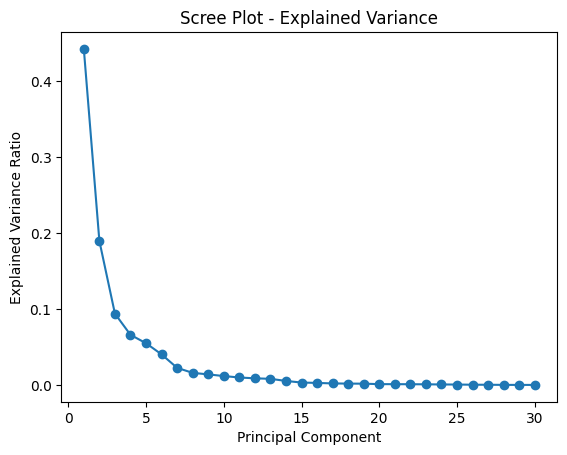

PCA Components to retain 95% variance: 10
Original Accuracy: 0.971
PCA Accuracy: 0.947


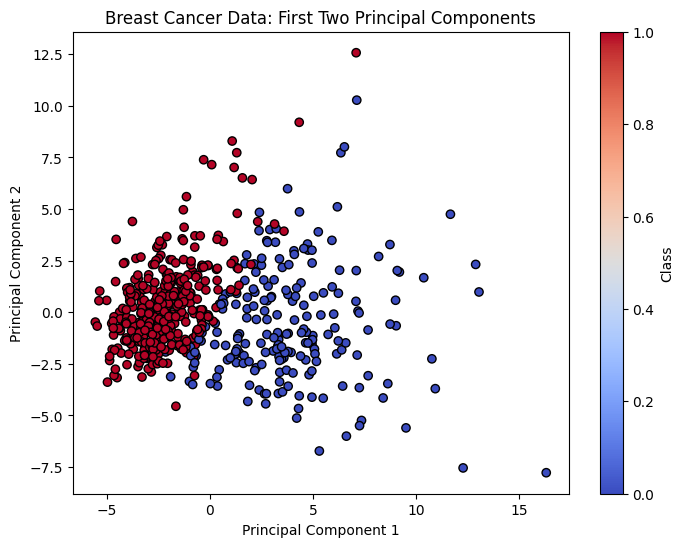

In [2]:
'''Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).'''

#Step 1: Load dataset
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

#Step 2: Apply PCA, scree plot

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA().fit(X_scaled)
explained_var = pca_full.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot - Explained Variance")
plt.show()

#Step 3: Retain 95% variance and transform

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("PCA Components to retain 95% variance:", pca.n_components_)

#Step 4: Train KNN on Original vs. PCA Data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
# KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
acc_orig = knn_orig.score(X_test, y_test)

# KNN on PCA data
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = knn_pca.score(X_test_pca, y_test)
print(f'Original Accuracy: {acc_orig:.3f}\nPCA Accuracy: {acc_pca:.3f}')

#Step 5: Scatter plot of first two PCs

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Breast Cancer Data: First Two Principal Components")
plt.colorbar(label="Class")
plt.show()




MSE (Euclidean): 5168.119991582047
MSE (Manhattan): 5479.050529314929


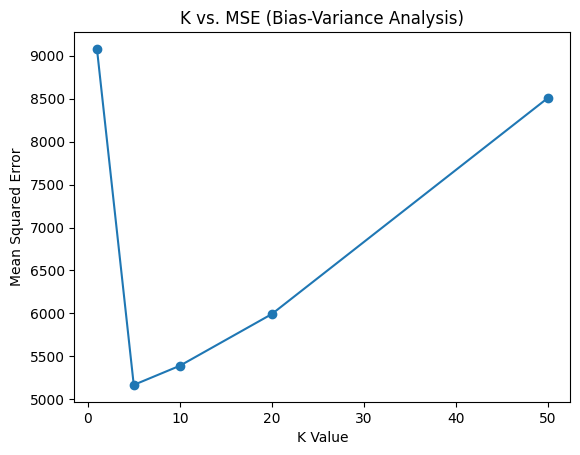

In [3]:
'''Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.'''

#Step 1: Generate synthetic regression dataset
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=10, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Step 2: Train KNN Regressors (Euclidean & Manhattan)

knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train, y_train)
pred_euc = knn_euc.predict(X_test)
mse_euc = mean_squared_error(y_test, pred_euc)

knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train, y_train)
pred_man = knn_man.predict(X_test)
mse_man = mean_squared_error(y_test, pred_man)

print("MSE (Euclidean):", mse_euc)
print("MSE (Manhattan):", mse_man)

#Step 3: K-value analysis

k_list = [1, 5, 10, 20, 50]
mse_values = []
for k in k_list:
    kr = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    kr.fit(X_train, y_train)
    pred = kr.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    mse_values.append(mse)

plt.plot(k_list, mse_values, marker='o')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.title('K vs. MSE (Bias-Variance Analysis)')
plt.show()

#Analysis: As K increases, variance drops but bias increases. Look for the 'elbow' in the curve for best K.


Brute-force Accuracy: 0.719, Time: 0.00s
KD-Tree Accuracy: 0.719, Time: 0.01s
Ball Tree Accuracy: 0.719, Time: 0.01s


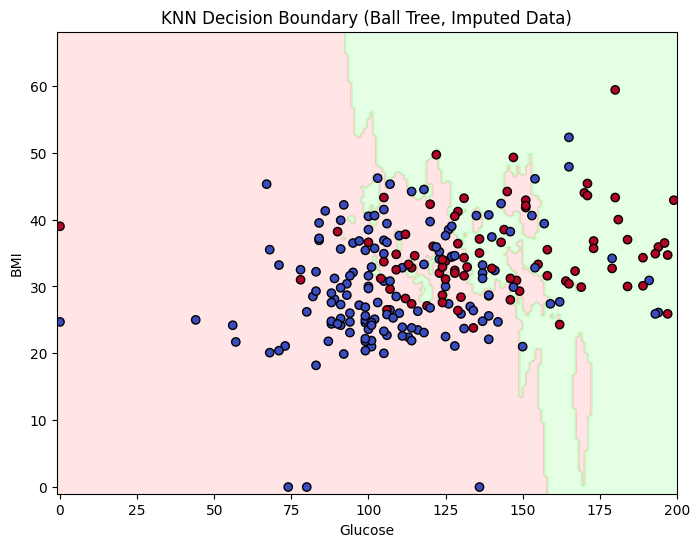

In [5]:
''' Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes'''

#Step 1: Load Pima Indians Diabetes dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
X = df.drop('Outcome', axis=1)
y = df['Outcome']


#Step 2: KNN Imputation

imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Split data AFTER imputation
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

#Step 4: Train KNN - different algorithms & timing

# Brute-force
start = time.time()
knn_brute = KNeighborsClassifier(algorithm='brute').fit(X_train, y_train)
brute_acc = knn_brute.score(X_test, y_test)
brute_time = time.time() - start

# KD-Tree
start = time.time()
knn_kd = KNeighborsClassifier(algorithm='kd_tree').fit(X_train, y_train)
kdtree_acc = knn_kd.score(X_test, y_test)
kdtree_time = time.time() - start

# Ball Tree
start = time.time()
knn_ball = KNeighborsClassifier(algorithm='ball_tree').fit(X_train, y_train)
balltree_acc = knn_ball.score(X_test, y_test)
balltree_time = time.time() - start

print(f'Brute-force Accuracy: {brute_acc:.3f}, Time: {brute_time:.2f}s')
print(f'KD-Tree Accuracy: {kdtree_acc:.3f}, Time: {kdtree_time:.2f}s')
print(f'Ball Tree Accuracy: {balltree_acc:.3f}, Time: {balltree_time:.2f}s')

#Step 5: Plot decision boundary (for the best, with 2 features)

# Assuming 'Glucose' and 'BMI' as 2 most important features (replace as appropriate):
feat1_idx = df.columns.get_loc('Glucose')
feat2_idx = df.columns.get_loc('BMI')

X_vis = X_imputed[:, [feat1_idx, feat2_idx]]

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42, stratify=y)

# Using Ball Tree as it generally performs well
best_knn_vis = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree').fit(X_train_vis, y_train_vis)

# Plot
x_min, x_max = X_vis[:,0].min()-1, X_vis[:,0].max()+1
y_min, y_max = X_vis[:,1].min()-1, X_vis[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = best_knn_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_test_vis[:,0], X_test_vis[:,1], c=y_test_vis, cmap='coolwarm', edgecolor='k')
plt.xlabel(df.columns[feat1_idx])
plt.ylabel(df.columns[feat2_idx])
plt.title('KNN Decision Boundary (Ball Tree, Imputed Data)')
plt.show()